In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split

import tensorflow as tf

# READ DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/age_gender.csv')

# DATA PROCESSING

In [4]:
data = data.drop('img_name', axis=1)

In [5]:
data['age'] = pd.qcut(data['age'], q=5, labels=[0, 1, 2, 3, 4])

In [6]:
np.sqrt(len(data['pixels'][0].split(' ')))

48.0

In [7]:
num_pixels = 2304
img_height = 48
img_width = 48

In [8]:
target_columns = ['gender', 'ethnicity', 'age']

y = data[target_columns]
X = data.drop(target_columns, axis=1)

# RESHAPE X

In [9]:
X = data['pixels'].str.split(' ', expand=True)

In [10]:
X = np.array(X).astype(int)
X = np.array([a.reshape(48, 48) for a in X])

In [11]:
X.shape

(23705, 48, 48)

# Training

In [12]:
y_gender = np.array(y['gender'])
y_ethnicity = np.array(y['ethnicity'])
y_age = np.array(y['age'])

In [13]:
len(y_ethnicity)

23705

## Model Def

In [14]:
def build_model(num_classes, activation, loss):
    
    inputs = tf.keras.Input(shape=(img_height, img_width, 1))
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
    x = tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(128, activation='relu')(x)
    outputs = tf.keras.layers.Dense(num_classes, activation=activation)(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    
    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

In [15]:
{column: list(data[column].unique()) for column in ['gender', 'ethnicity', 'age']}

{'age': [0, 4, 1, 2, 3], 'ethnicity': [2, 3, 4, 0, 1], 'gender': [0, 1]}

In [16]:
X_gender_train, X_gender_test, y_gender_train, y_gender_test = train_test_split(X, y_gender, train_size=0.7)
X_ethnicity_train, X_ethnicity_test, y_ethnicity_train, y_ethnicity_test = train_test_split(X, y_ethnicity, train_size=0.7)
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X, y_age, train_size=0.7)

## Age Training Fix Loss: binary_crossentropy (NOT WORKING)

## Age Training Fix Loss: sparse_categorical_crossentropy

## Activation: sigmoid, Loss: sparse_categorical_crossentropy

223/223 [==============================] - 1s 5ms/step - loss: 1.1149 - accuracy: 0.5330


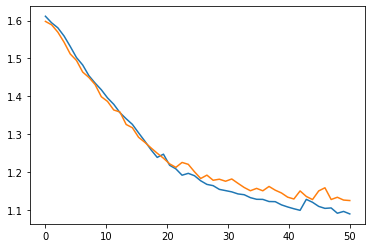

In [17]:
age_model = build_model(5, activation='sigmoid', loss='sparse_categorical_crossentropy')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

## Activation: softmax, Loss: sparse_categorical_crossentropy

223/223 [==============================] - 1s 5ms/step - loss: 1.1228 - accuracy: 0.5262


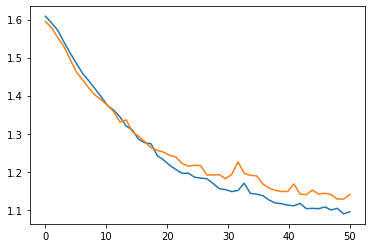

In [18]:
age_model = build_model(5, activation='softmax', loss='sparse_categorical_crossentropy')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

## Activation: relu, Loss: sparse_categorical_crossentropy

223/223 [==============================] - 1s 5ms/step - loss: 1.6094 - accuracy: 0.2057


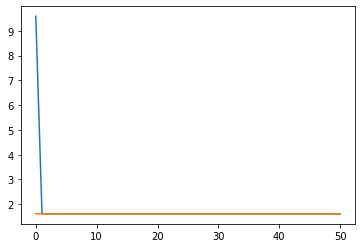

In [19]:
age_model = build_model(5, activation='relu', loss='sparse_categorical_crossentropy')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

## Age Training Fix Loss: mean_squared_error

## Activation: sigmoid, Loss: mean_squared_error

223/223 [==============================] - 1s 5ms/step - loss: 2.9633 - accuracy: 0.2057


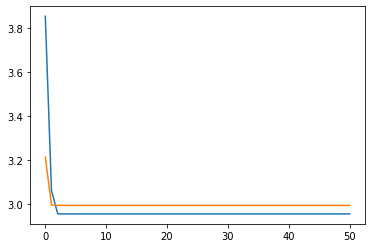

In [20]:
age_model = build_model(5, activation='sigmoid', loss='mean_squared_error')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

## Activation: softmax, Loss: mean_squared_error

223/223 [==============================] - 1s 5ms/step - loss: 5.1630 - accuracy: 0.1745


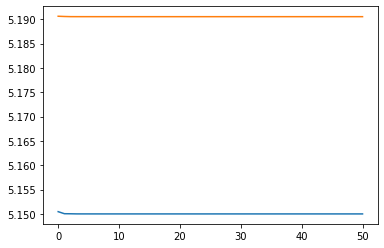

In [21]:
age_model = build_model(5, activation='softmax', loss='mean_squared_error')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

## Activation: relu, Loss: mean_squared_error

223/223 [==============================] - 1s 5ms/step - loss: 2.2687 - accuracy: 0.3039


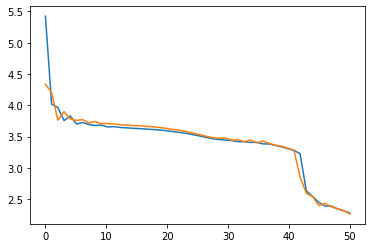

In [22]:
age_model = build_model(5, activation='relu', loss='mean_squared_error')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [23]:
## Age Training Fix Loss: mean_squared_logarithmic_error

In [24]:
## Activation: sigmoid, Loss: mean_squared_logarithmic_error

223/223 [==============================] - 1s 5ms/step - loss: 0.3913 - accuracy: 0.2057


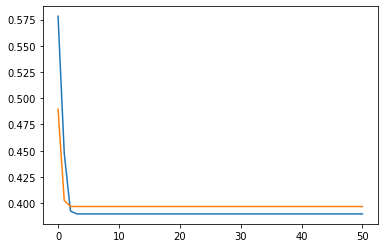

In [25]:
age_model = build_model(5, activation='sigmoid', loss='mean_squared_logarithmic_error')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [26]:
## Activation: softmax, Loss: mean_squared_logarithmic_error

223/223 [==============================] - 1s 5ms/step - loss: 0.9113 - accuracy: 0.2035


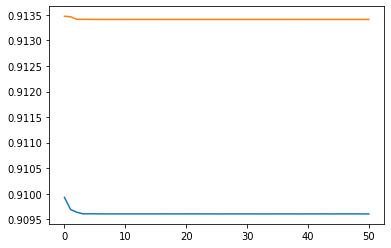

In [27]:
age_model = build_model(5, activation='softmax', loss='mean_squared_logarithmic_error')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [28]:
## Activation: relu, Loss: mean_squared_logarithmic_error

223/223 [==============================] - 1s 5ms/step - loss: 0.2489 - accuracy: 0.2575


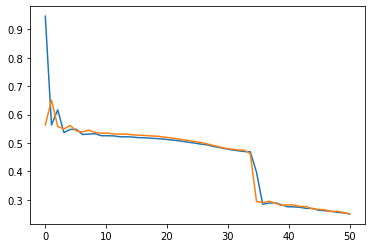

In [29]:
age_model = build_model(5, activation='relu', loss='mean_squared_logarithmic_error')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [30]:
## Age Training Fix Loss: mean_absolute_error

In [31]:
## Activation: sigmoid, Loss: mean_absolute_error

223/223 [==============================] - 1s 5ms/step - loss: 1.3862 - accuracy: 0.2057


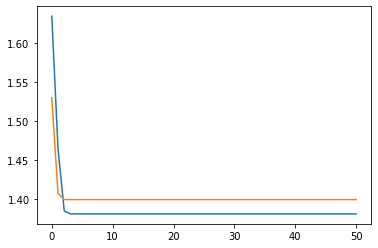

In [32]:
age_model = build_model(5, activation='sigmoid', loss='mean_absolute_error')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [33]:
## Activation: softmax, Loss: mean_absolute_error

223/223 [==============================] - 1s 5ms/step - loss: 1.8571 - accuracy: 0.1874


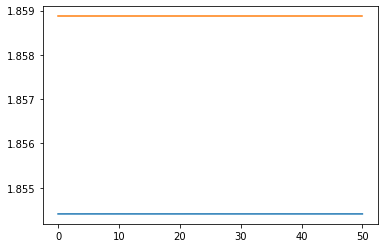

In [35]:
age_model = build_model(5, activation='softmax', loss='mean_absolute_error')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [36]:
## Activation: relu, Loss: mean_absolute_error

223/223 [==============================] - 1s 5ms/step - loss: 0.8984 - accuracy: 0.1343


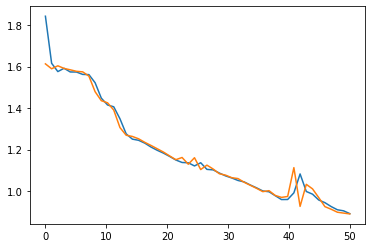

In [37]:
age_model = build_model(5, activation='relu', loss='mean_absolute_error')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [38]:
## Age Training Fix Loss: categorical_hinge

In [39]:
## Activation: sigmoid, Loss: categorical_hinge

223/223 [==============================] - 1s 5ms/step - loss: 0.2469 - accuracy: 0.2154


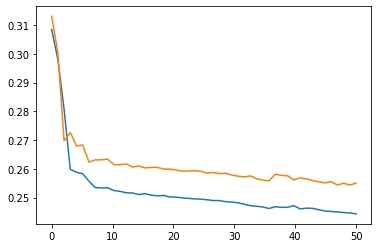

In [40]:
age_model = build_model(5, activation='sigmoid', loss='categorical_hinge')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [41]:
## Activation: softmax, Loss: categorical_hinge

223/223 [==============================] - 1s 5ms/step - loss: 0.2469 - accuracy: 0.2009


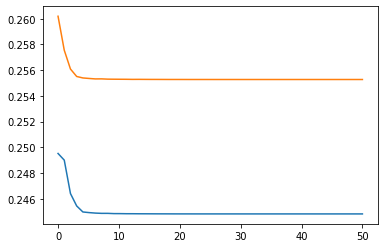

In [42]:
age_model = build_model(5, activation='softmax', loss='categorical_hinge')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [43]:
## Activation: relu, Loss: categorical_hinge

223/223 [==============================] - 1s 5ms/step - loss: 0.2404 - accuracy: 0.1971


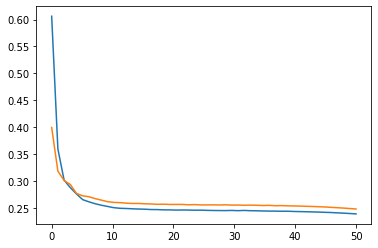

In [44]:
age_model = build_model(5, activation='relu', loss='categorical_hinge')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [45]:
## Age Training Fix Loss: logcosh

In [46]:
## Activation: sigmoid, Loss: logcosh

223/223 [==============================] - 1s 5ms/step - loss: 0.8908 - accuracy: 0.2057


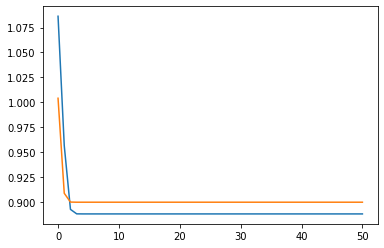

In [47]:
age_model = build_model(5, activation='sigmoid', loss='logcosh')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [48]:
## Activation: softmax, Loss: logcosh

223/223 [==============================] - 1s 5ms/step - loss: 1.3135 - accuracy: 0.1918


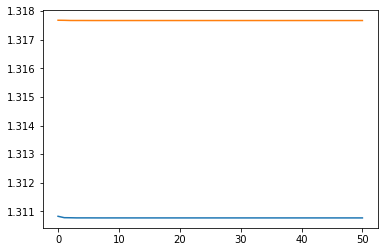

In [49]:
age_model = build_model(5, activation='softmax', loss='logcosh')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]

In [50]:
## Activation: relu, Loss: logcosh

223/223 [==============================] - 1s 5ms/step - loss: 0.4541 - accuracy: 0.2199


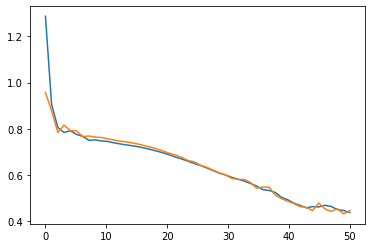

In [51]:
age_model = build_model(5, activation='relu', loss='logcosh')

age_history = age_model.fit(
    X_age_train,
    y_age_train,
    validation_split=0.2,
    batch_size=5000,
    epochs=50,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],
    verbose=0
)

x = np.linspace(0, 50, 50)
plt.plot(x, age_history.history['loss'])
plt.plot(x, age_history.history['val_loss'])

age_acc = age_model.evaluate(X_age_test, y_age_test)[1]